In [1]:
import pandas as pd         
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt




In [2]:

df = pd.read_csv('a_Dataset_CreditScoring.csv')





In [3]:
df

,TARGET,ID,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
0,1,582,3,3,0,4,0.0,5,117,27,...,3.0,92%,21%,2,3,7,21%,4,4,0%
1,1,662,15,9,0,3,1.0,3,14,14,...,1.0,80%,0%,0,0,0,100%,12,0,100%
2,1,805,0,0,0,1,5.0,1,354,7,...,5.0,36%,65%,0,1,1,73%,1,1,53%
3,1,1175,8,5,0,6,1.0,10,16,4,...,3.0,91%,25%,1,1,1,75%,7,1,133%
4,1,1373,3,1,0,9,0.0,8,130,52,...,1.0,125%,0%,0,1,4,14%,3,1,0%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,126441,0,0,0,2,0.0,2,199,10,...,9.0,79%,69%,0,0,0,65%,0,0,35%
2996,0,126448,0,0,0,0,NaN,0,270,3,...,5.0,58%,93%,0,0,0,86%,0,0,42%
2997,0,126465,1,1,0,8,0.0,5,234,4,...,9.0,87%,61%,0,0,0,43%,1,0,75%
2998,0,126487,4,4,0,2,3.0,1,257,3,...,3.0,104%,60%,0,1,2,60%,4,1,100%


In [4]:
df.isnull().sum()

TARGET               0
ID                   0
DerogCnt             0
CollectCnt           0
BanruptcyInd         0
InqCnt06             0
InqTimeLast        188
InqFinanceCnt24      0
TLTimeFirst          0
TLTimeLast           0
TLCnt03              0
TLCnt12              0
TLCnt24              0
TLCnt                3
TLSum               40
TLMaxSum            40
TLSatCnt             4
TLDel60Cnt           0
TLBadCnt24           0
TL75UtilCnt         99
TL50UtilCnt         99
TLBalHCPct          41
TLSatPct             4
TLDel3060Cnt24       0
TLDel90Cnt24         0
TLDel60CntAll        0
TLOpenPct            3
TLBadDerogCnt        0
TLDel60Cnt24         0
TLOpen24Pct          3
dtype: int64

In [5]:
# # Money columns (e.g. with $ and ,)
# money_cols = ['TLSum', 'TLMaxSum']

# Percent columns (e.g. with %)
percent_cols = ['TLBalHCPct', 'TLSatPct', 'TLOpenPct']

# Clean money columns
# for col in money_cols:
#     df[col] = df[col].str.replace('$', '', regex=False)\
#                      .str.replace(',', '', regex=False)\
#                      .str.strip().astype(float)

# Clean percent columns
for col in percent_cols:
    df[col] = df[col].str.replace('%', '', regex=False)\
                     .str.strip().astype(float)

# Preview cleaned columns
df[percent_cols].head()

,TLBalHCPct,TLSatPct,TLOpenPct
0,92.0,21.0,21.0
1,80.0,0.0,100.0
2,36.0,65.0,73.0
3,91.0,25.0,75.0
4,125.0,0.0,14.0


In [6]:
# # Correlation with target only (excluding 'TARGET' itself)
# target_corr = df.corr()['TARGET'].drop('TARGET')


In [7]:
# threshold = 0.05
# selected_features = target_corr[abs(target_corr) >= threshold].index.tolist()

In [8]:
# dropped_features = target_corr[abs(target_corr) < threshold].index.tolist()
# print("Dropped features due to low correlation:", dropped_features)

In [9]:
df = df.drop([
    'ID', 'BanruptcyInd', 'InqTimeLast', 'TLTimeLast',
    'TLCnt03', 'TLCnt12', 'TLCnt24', 'TLCnt',
    'TLSum', 'TLMaxSum', 'TLOpen24Pct'
], axis=1)



In [10]:
df

,TARGET,DerogCnt,CollectCnt,InqCnt06,InqFinanceCnt24,TLTimeFirst,TLSatCnt,TLDel60Cnt,TLBadCnt24,TL75UtilCnt,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24
0,1,3,3,4,5,117,16.0,2,1,3.0,3.0,92.0,21.0,2,3,7,21.0,4,4
1,1,15,9,3,3,14,1.0,0,0,1.0,1.0,80.0,0.0,0,0,0,100.0,12,0
2,1,0,0,1,1,354,21.0,1,1,4.0,5.0,36.0,65.0,0,1,1,73.0,1,1
3,1,8,5,6,10,16,1.0,1,0,2.0,3.0,91.0,25.0,1,1,1,75.0,7,1
4,1,3,1,9,8,130,3.0,4,1,1.0,1.0,125.0,0.0,0,1,4,14.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,0,0,2,2,199,25.0,0,0,7.0,9.0,79.0,69.0,0,0,0,65.0,0,0
2996,0,0,0,0,0,270,13.0,0,0,5.0,5.0,58.0,93.0,0,0,0,86.0,0,0
2997,0,1,1,8,5,234,26.0,0,0,7.0,9.0,87.0,61.0,0,0,0,43.0,1,0
2998,0,4,4,2,1,257,4.0,1,1,3.0,3.0,104.0,60.0,0,1,2,60.0,4,1


In [11]:
df.info

<bound method DataFrame.info of       TARGET  DerogCnt  CollectCnt  InqCnt06  InqFinanceCnt24  TLTimeFirst  \
0          1         3           3         4                5          117   
1          1        15           9         3                3           14   
2          1         0           0         1                1          354   
3          1         8           5         6               10           16   
4          1         3           1         9                8          130   
...      ...       ...         ...       ...              ...          ...   
2995       0         0           0         2                2          199   
2996       0         0           0         0                0          270   
2997       0         1           1         8                5          234   
2998       0         4           4         2                1          257   
2999       0         2           1         0                0          254   

      TLSatCnt  TLDel60Cnt  TLB

In [12]:
percent_cols = ['TLBalHCPct', 'TLSatPct', 'TLOpenPct']

for col in percent_cols:
    df[col] = df[col].astype(str).str.replace('%', '', regex=False).str.strip()
    df[col] = pd.to_numeric(df[col], errors='coerce')  # safely convert to float



In [13]:
df.head(10)

,TARGET,DerogCnt,CollectCnt,InqCnt06,InqFinanceCnt24,TLTimeFirst,TLSatCnt,TLDel60Cnt,TLBadCnt24,TL75UtilCnt,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24
0,1,3,3,4,5,117,16.0,2,1,3.0,3.0,92.0,21.0,2,3,7,21.0,4,4
1,1,15,9,3,3,14,1.0,0,0,1.0,1.0,80.0,0.0,0,0,0,100.0,12,0
2,1,0,0,1,1,354,21.0,1,1,4.0,5.0,36.0,65.0,0,1,1,73.0,1,1
3,1,8,5,6,10,16,1.0,1,0,2.0,3.0,91.0,25.0,1,1,1,75.0,7,1
4,1,3,1,9,8,130,3.0,4,1,1.0,1.0,125.0,0.0,0,1,4,14.0,3,1
5,1,1,1,2,0,124,5.0,2,0,4.0,4.0,103.0,50.0,0,0,2,63.0,0,0
6,1,0,0,1,1,148,24.0,0,0,7.0,9.0,71.0,59.0,3,0,0,52.0,0,0
7,1,3,2,5,3,124,12.0,0,0,4.0,4.0,67.0,53.0,2,0,2,47.0,1,1
8,1,1,1,2,3,286,5.0,6,2,3.0,4.0,80.0,15.0,1,5,6,46.0,5,5
9,1,0,0,0,0,175,17.0,1,0,4.0,5.0,60.0,61.0,1,0,1,56.0,0,0


In [14]:
# Drop ID column, define features and target
X = df.drop(columns=['TARGET'])
y = df['TARGET']


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=55
)


In [16]:
y_train.value_counts()



TARGET
0    2000
1     400
Name: count, dtype: int64

In [17]:
y_test.value_counts()

TARGET
0    500
1    100
Name: count, dtype: int64

In [18]:
# Pipeline: Impute missing values, then scale
preprocessing = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])


In [19]:
# Fit and transform on training data
X_train_scaled = preprocessing.fit_transform(X_train)

# Transform test data (use same fitted scaler)
X_test_scaled = preprocessing.transform(X_test)


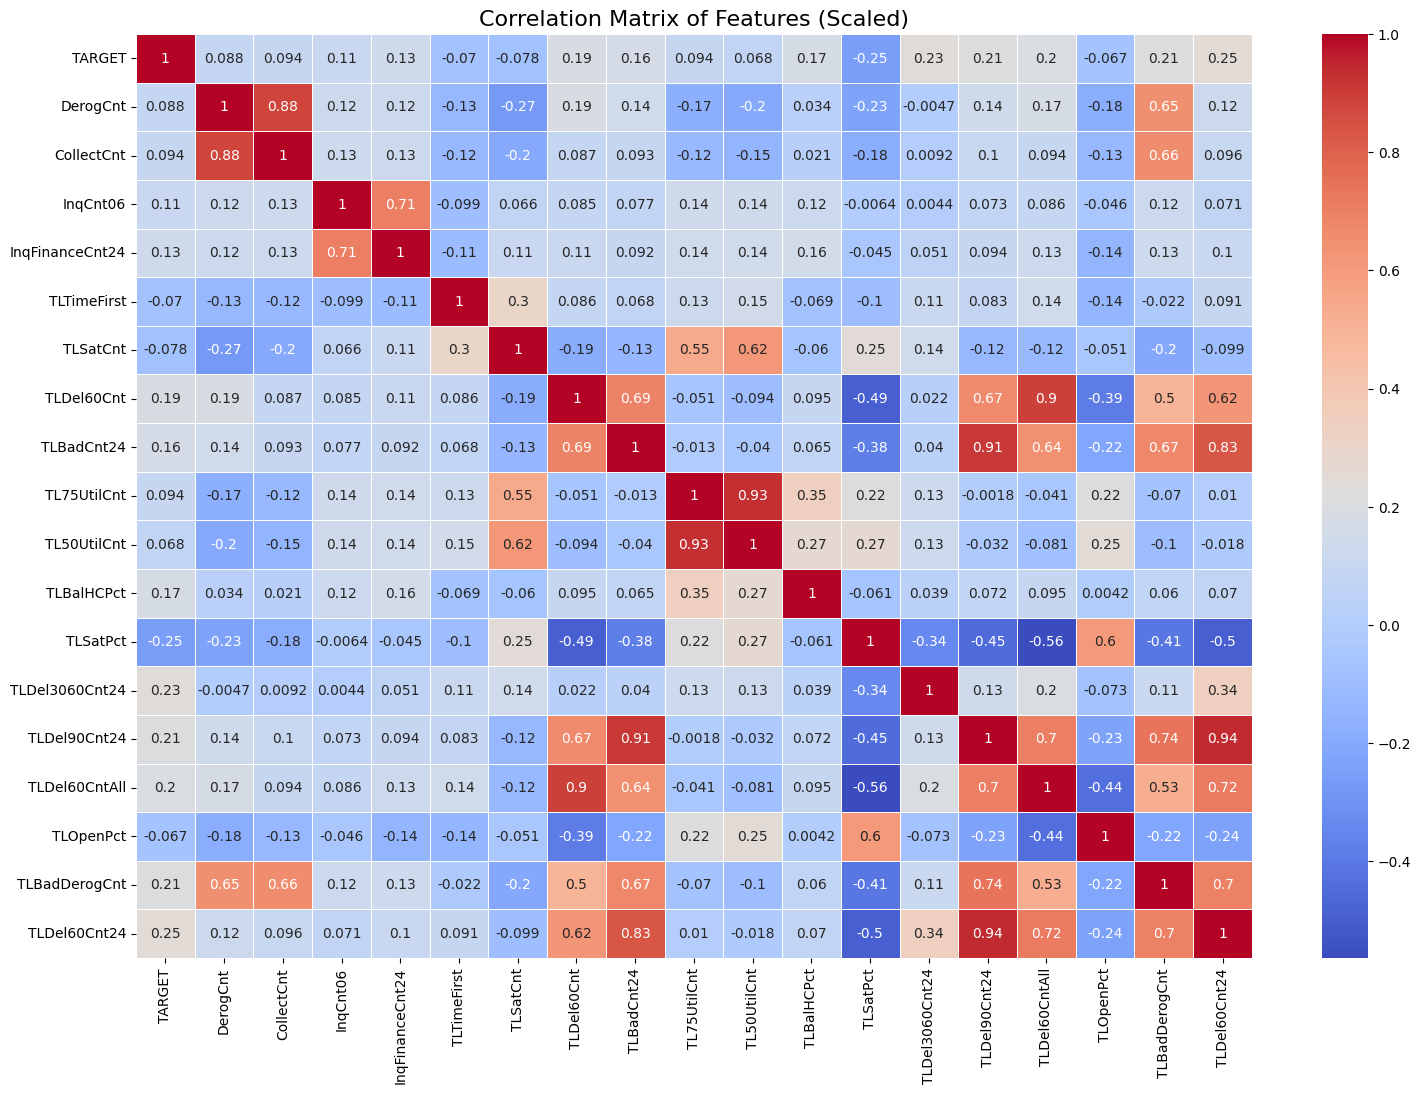

In [20]:
corr_matrix = df.corr()
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, linewidths=0.5)
plt.title('Correlation Matrix of Features (Scaled)', fontsize=16)
plt.show()



In [21]:
X_test_scaled

array([[-0.5417819 , -0.42238807, -0.04219219, ...,  0.10413892,
        -0.60849814, -0.59883205],
       [ 0.62999031,  0.60469538,  0.52037031, ..., -0.67138259,
         1.64172612,  1.12442565],
       [-0.5417819 , -0.42238807, -0.88603593, ...,  0.00719873,
        -0.60849814, -0.59883205],
       ...,
       [ 0.23939957, -0.42238807, -0.04219219, ..., -1.83466486,
        -0.60849814, -0.02441282],
       [-0.15119116, -0.42238807, -0.60475468, ..., -0.18668165,
        -0.60849814, -0.59883205],
       [-0.15119116, -0.42238807,  1.92677655, ..., -1.01067326,
         3.44190553,  4.57094105]], shape=(600, 18))

In [22]:
# Models to evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced')
}


# To store results
results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]  # For ROC-AUC

    results[name] = {
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_proba)
    }


In [23]:
import pandas as pd

# Display results as a sorted DataFrame
results_df = pd.DataFrame(results).T.round(3)
results_df = results_df.sort_values(by="ROC-AUC", ascending=False)
print(results_df)


                     Precision  Recall  F1-Score  ROC-AUC
Logistic Regression      0.337    0.70     0.455    0.781
Random Forest            0.375    0.06     0.103    0.770
Decision Tree            0.230    0.23     0.230    0.538
